In [103]:
import pandas  as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from keras.models  import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [104]:
data = pd.read_csv("data/train.csv")

In [105]:
data.shape

(17000, 9)

In [106]:
dataset = data.copy(deep=True)

In [107]:
type(dataset["median_income"])

pandas.core.series.Series

In [108]:
dataset.columns.values

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'], dtype=object)

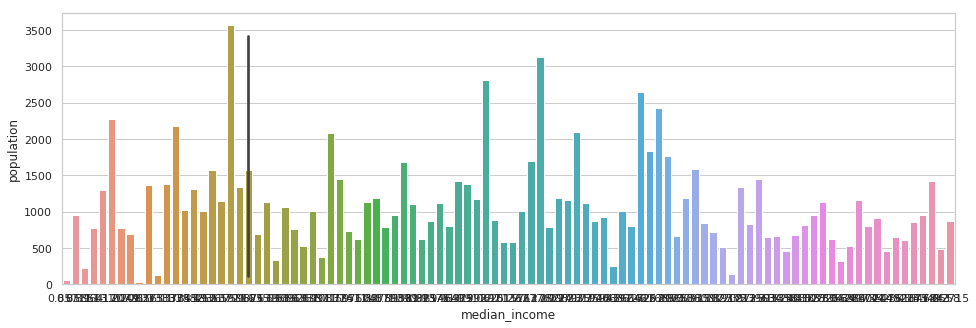

In [109]:
plt.figure(figsize=(16,5))
sns.set(style="whitegrid")
sns.barplot(x="median_income", y ="population",data=dataset.head(100))

In [110]:
x = pd.cut(x =dataset["median_house_value"],bins=4)

In [111]:
x.unique()

[(14513.998, 136249.5], (136249.5, 257500.0], (378750.5, 500001.0], (257500.0, 378750.5]]
Categories (4, interval[float64]): [(14513.998, 136249.5] < (136249.5, 257500.0] < (257500.0, 378750.5] < (378750.5, 500001.0]]

In [112]:
#create median_house_value_portion
#dataset["median_house_value_portion_cat"] = pd.cut(x =dataset["median_house_value"],bins=4,labels=["Trop bas","Bas","Elevé","Trop Elevé"])
dataset.loc[(dataset["median_house_value"] < 14513.998), "median_house_value_portion_cat"] ="plus que bas"
dataset.loc[(dataset["median_house_value"] > 14513.998) & (dataset["median_house_value"] <= 136249.5), "median_house_value_portion_cat"] ="Trop bas" 
dataset.loc[(dataset["median_house_value"] > 136249.5) & (dataset["median_house_value"] <= 257500.0), "median_house_value_portion_cat"] ="Bas" 
dataset.loc[(dataset["median_house_value"] > 257500.0) & (dataset["median_house_value"] <= 378750.5), "median_house_value_portion_cat"] ="Elevé" 
dataset.loc[(dataset["median_house_value"] > 378750.5) & (dataset["median_house_value"] <= 500001.0), "median_house_value_portion_cat"] ="Trop Elevé"
dataset.loc[(dataset["median_house_value"] > 500001.0) , "median_house_value_portion_cat"] ="+ Elevé"

dataset.loc[(dataset["median_house_value_portion_cat"] == "plus que bas"), "median_house_value_portion_cat"] = 0 
dataset.loc[(dataset["median_house_value_portion_cat"] == "Trop bas"), "median_house_value_portion_cat"] = 1
dataset.loc[(dataset["median_house_value_portion_cat"] == "Bas"), "median_house_value_portion_cat"] = 2
dataset.loc[(dataset["median_house_value_portion_cat"] == "Elevé"), "median_house_value_portion_cat"] = 3
dataset.loc[(dataset["median_house_value_portion_cat"] == "Trop Elevé"), "median_house_value_portion_cat"] = 4
#dataset.loc[(dataset["median_house_value_portion_cat"] == "+ Elevé"), "median_house_value_portion_cat"] = 5

#dataset.loc[(dataset["median_house_value"] > 136249.5) & (dataset["median_house_value"] <= 257500.0), "median_house_value_portion_cat"] ="Bas" 
#dataset.loc[(dataset["median_house_value"] > 257500.0) & (dataset["median_house_value"] <= 378750.5), "median_house_value_portion_cat"] ="Elevé" 
#dataset.loc[(dataset["median_house_value"] > 378750.5) & (dataset["median_house_value"] <= 500001.0), "median_house_value_portion_cat"] ="Trop Elevé"



In [89]:
dataset["median_house_value_portion_cat"].isnull().sum()

0

In [ ]:
dataset["median_house_value_val"].unique()

In [ ]:
plt.figure(figsize=(16,5))
sns.set(style="whitegrid")
sns.barplot(x="median_house_value_portion_cat",y="population",data=dataset)

In [ ]:
dataset.columns.values

In [115]:
data_cols_cat = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income']
target_col = ['median_house_value_portion_cat']
data_col_all = data_cols_cat + target_col

In [116]:
train, validate, test = np.split(dataset[data_col_all].sample(frac=1), [int(.6*len(dataset[data_col_all])), int(.8*len(dataset[data_col_all]))])

In [130]:
train_x = train[data_cols_cat]
train_y = train[target_col]
train_y_one_hot = np_utils.to_categorical(train_y)

valid_x = validate[data_cols_cat]
valid_y = validate[target_col]
valid_y_one_hot = np_utils.to_categorical(valid_y)

test_x = test[data_cols_cat]
test_y = test[target_col]
test_y_one_hot = np_utils.to_categorical(test_y)

#ww = np_utils.to_categorical(dataset["median_house_value_portion_cat"].values)

In [136]:
#create model 
model = Sequential()
model.add(Dense(10, activation="relu",input_dim=train_x.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(5, activation="softmax"))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [137]:
hist = model.fit(train_x,train_y_one_hot,validation_data=(valid_x,valid_y_one_hot), epochs=20, batch_size=8)

Train on 10200 samples, validate on 3400 samples
Epoch 1/20
10200/10200 [==============================] - 3s 246us/step - loss: 12.3716 - acc: 0.2220 - val_loss: 11.2163 - val_acc: 0.3041
Epoch 2/20
10200/10200 [==============================] - 2s 201us/step - loss: 11.4288 - acc: 0.2837 - val_loss: 11.2116 - val_acc: 0.3044
Epoch 3/20
10200/10200 [==============================] - 2s 200us/step - loss: 11.0910 - acc: 0.3042 - val_loss: 11.2116 - val_acc: 0.3044
Epoch 4/20
10200/10200 [==============================] - 2s 202us/step - loss: 10.9833 - acc: 0.3106 - val_loss: 11.2116 - val_acc: 0.3044
Epoch 5/20
10200/10200 [==============================] - 2s 203us/step - loss: 10.8761 - acc: 0.3172 - val_loss: 11.2116 - val_acc: 0.3044
Epoch 6/20
10200/10200 [==============================] - 2s 205us/step - loss: 10.8902 - acc: 0.3173 - val_loss: 11.2116 - val_acc: 0.3044
Epoch 7/20
10200/10200 [==============================] - 2s 200us/step - loss: 10.5914 - acc: 0.3344 - val_los

In [138]:
model.evaluate(test_x, test_y_one_hot)

3400/3400 [==============================] - 0s 26us/step


[9.1816402569939104, 0.42852941176470588]

In [139]:
model.predict(test_x)

array([[ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.]], dtype=float32)

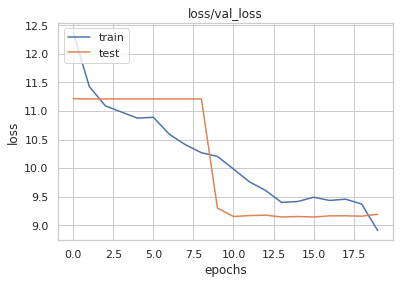

In [143]:
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("loss/val_loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#simple exemple

In [ ]:
keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)

In [99]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

# Generate dummy data
import numpy as np
x_train = np.random.random((1000, 20))
y_train = keras.utils.to_categorical(np.random.randint(10, size=(1000, 1)), num_classes=10)
x_test = np.random.random((100, 20))
y_test = keras.utils.to_categorical(np.random.randint(10, size=(100, 1)), num_classes=10)

model = Sequential()
# Dense(64) is a fully-connected layer with 64 hidden units.
# in the first layer, you must specify the expected input data shape:
# here, 20-dimensional vectors.
model.add(Dense(64, activation='relu', input_dim=20))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

y_train.shape
model.fit(x_train, y_train,          epochs=20,          batch_size=128)
score = model.evaluate(x_test, y_test, batch_size=128)

Epoch 1/20
1000/1000 [==============================] - 1s 538us/step - loss: 2.4061 - acc: 0.0910
Epoch 2/20
1000/1000 [==============================] - 0s 21us/step - loss: 2.3683 - acc: 0.1170
Epoch 3/20
1000/1000 [==============================] - 0s 21us/step - loss: 2.3313 - acc: 0.1240
Epoch 4/20
1000/1000 [==============================] - 0s 21us/step - loss: 2.3334 - acc: 0.0970
Epoch 5/20
1000/1000 [==============================] - 0s 21us/step - loss: 2.3190 - acc: 0.1300
Epoch 6/20
1000/1000 [==============================] - 0s 22us/step - loss: 2.3191 - acc: 0.1050
Epoch 7/20
1000/1000 [==============================] - 0s 21us/step - loss: 2.3241 - acc: 0.0980
Epoch 8/20
1000/1000 [==============================] - 0s 21us/step - loss: 2.3101 - acc: 0.1110
Epoch 9/20
1000/1000 [==============================] - 0s 22us/step - loss: 2.3133 - acc: 0.1070
Epoch 10/20
1000/1000 [==============================] - 0s 21us/step - loss: 2.3051 - acc: 0.1090
Epoch 11/20
1000/1

In [ ]:
score

In [27]:
from sklearn.datasets.samples_generator import make_blobs

In [34]:
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
y = to_categorical(y)


In [36]:
y.shape

(1000, 3)

In [46]:
from keras.datasets import fashion_mnist

In [47]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

In [48]:
for c in trainY:
    print(c)

#trainY = to_categorical(trainY)

9
0
0
3
0
2
7
2
5
5
0
9
5
5
7
9
1
0
6
4
3
1
4
8
4
3
0
2
4
4
5
3
6
6
0
8
5
2
1
6
6
7
9
5
9
2
7
3
0
3
3
3
7
2
2
6
6
8
3
3
5
0
5
5
0
2
0
0
4
1
3
1
6
3
1
4
4
6
1
9
1
3
5
7
9
7
1
7
9
9
9
3
2
9
3
6
4
1
1
8
8
0
1
1
6
8
1
9
7
8
8
9
6
6
3
1
5
4
6
7
5
5
9
2
2
2
7
6
4
1
8
7
7
5
4
2
9
1
7
4
6
9
7
1
8
7
1
2
8
0
9
1
8
7
0
5
8
6
7
2
0
8
7
1
6
2
1
9
6
0
1
0
5
5
1
7
0
5
8
4
0
4
0
6
6
4
0
0
4
7
3
0
5
8
4
1
1
2
9
2
8
5
0
6
3
4
6
0
9
1
7
3
8
5
8
3
8
5
2
0
8
7
0
3
5
0
6
5
2
7
5
2
6
8
2
6
8
0
4
4
4
4
4
1
5
6
5
3
3
7
3
3
6
2
8
4
6
5
9
3
2
3
2
4
4
8
2
5
3
0
7
2
0
2
5
7
2
3
1
7
6
2
9
1
9
1
1
8
7
8
4
2
6
6
7
9
4
6
1
9
5
6
0
5
0
1
6
1
1
6
7
4
4
8
6
4
6
9
3
7
5
0
8
3
4
0
3
3
2
0
1
0
3
8
3
9
1
9
0
4
7
7
8
5
6
5
6
8
2
5
2
3
1
6
0
7
8
7
8
1
9
6
4
5
7
1
7
6
6
7
3
5
8
7
3
3
9
0
3
1
6
4
7
0
5
1
5
4
4
5
9
1
0
5
8
3
4
4
2
4
2
5
6
7
2
2
5
3
8
8
6
8
4
4
1
0
2
7
1
1
8
8
2
7
9
7
4
1
2
0
8
9
1
4
9
5
6
7
0
3
2
0
4
1
0
0
8
7
0
2
9
9
1
3
8
3
1
4
8
5
1
8
2
4
4
9
5
5
4
5
6
3
7
4
9
5
8
9
3
9
6
4
7
2
2
6
4
8
3
0
2
8
9
0
8
6
3
9
1
6


7
7
4
1
8
8
1
7
0
3
3
3
6
3
2
4
1
9
9
1
3
5
0
2
7
2
3
7
1
2
9
2
1
4
3
9
6
1
1
9
9
9
4
1
1
3
9
8
1
5
2
2
2
8
0
0
1
8
0
0
7
1
5
8
4
0
8
2
5
0
6
1
3
6
4
5
6
0
0
8
3
5
7
4
6
9
0
9
8
6
8
1
0
3
2
7
8
7
0
7
1
3
8
9
3
1
2
3
8
5
2
5
4
3
3
9
6
0
2
4
9
3
5
9
6
1
8
1
5
8
7
4
2
2
7
9
6
1
4
5
0
1
2
1
4
1
2
6
8
9
6
1
6
8
3
3
9
8
0
3
1
6
8
2
3
4
5
6
9
6
0
3
8
7
7
3
9
9
5
1
8
4
2
9
3
3
5
3
6
5
8
0
0
7
8
0
2
2
5
5
7
9
4
8
3
2
9
3
8
0
4
7
8
0
9
4
5
7
9
3
4
0
6
3
1
2
9
0
9
1
5
7
4
6
7
5
0
8
1
4
4
3
0
8
5
0
1
5
7
1
7
7
4
0
2
1
6
9
0
9
8
7
2
0
5
4
6
6
1
3
5
9
4
7
9
7
8
6
1
1
3
2
2
3
8
8
1
4
9
3
3
8
9
7
3
4
6
9
4
7
9
2
1
4
6
5
0
3
8
6
1
9
2
1
1
5
9
8
6
9
0
0
4
9
4
1
6
9
5
3
8
0
5
2
0
5
1
7
3
6
2
2
9
9
5
0
7
4
9
6
5
7
3
1
1
8
1
1
2
2
9
1
2
8
9
6
1
9
6
7
6
5
8
3
4
0
7
9
9
9
4
4
3
4
0
1
8
6
3
6
4
3
2
8
7
3
4
7
1
3
4
2
0
8
5
5
9
1
5
3
5
9
0
3
9
6
4
2
9
0
8
3
3
2
2
0
8
3
6
6
1
9
1
0
3
1
7
8
9
5
4
5
6
3
0
7
9
8
0
3
2
6
2
5
8
2
3
9
5
2
8
1
3
7
1
7
5
5
0
1
5
1
8
0
2
7
1
7
8
3
4
1
3
8
2
2
5
1
0
9
2
8
6
0
3
3
9
6
5
3


9
5
7
0
4
0
1
0
2
3
0
6
5
1
5
5
7
9
0
8
2
9
3
3
9
5
3
8
2
1
7
3
3
0
8
9
0
7
4
3
7
3
2
8
9
3
2
2
5
5
1
7
9
1
6
5
4
1
1
3
8
3
9
8
6
9
7
7
8
4
4
5
0
0
8
2
6
5
3
8
2
0
6
3
0
4
9
9
0
1
9
6
9
7
7
9
7
0
3
4
6
6
2
8
9
0
5
1
3
0
4
4
7
4
5
4
7
4
8
4
1
3
7
8
0
0
3
8
4
5
6
9
1
0
7
9
6
3
2
3
2
8
6
2
1
6
1
1
2
1
6
9
6
1
6
5
8
6
7
3
7
6
0
5
7
1
5
3
9
9
0
9
3
3
9
5
6
8
5
7
0
2
3
7
0
2
4
7
8
8
2
5
0
9
4
1
4
0
1
4
1
0
8
6
2
3
1
7
9
1
0
9
0
9
2
7
0
5
7
0
4
0
2
6
8
0
5
8
4
4
2
1
7
3
8
1
7
4
4
6
5
4
4
2
5
4
6
7
1
0
0
2
8
2
3
4
9
4
8
4
9
8
5
3
6
7
7
3
9
0
2
2
7
2
9
1
3
1
2
0
7
2
3
5
2
5
0
5
8
6
1
5
7
8
7
6
4
3
8
3
4
6
5
7
7
8
6
3
8
5
0
5
2
0
5
7
5
4
9
7
0
3
9
2
0
7
2
7
2
3
1
6
1
4
9
2
2
8
3
6
0
7
8
7
0
8
7
5
6
1
9
5
5
7
6
5
2
4
9
8
2
3
1
0
6
2
6
2
1
6
5
2
7
0
9
5
5
9
6
2
9
3
7
3
5
8
5
5
5
3
2
5
0
7
1
0
9
7
3
0
1
4
4
1
7
7
0
8
6
2
0
7
6
8
8
6
4
0
7
5
4
2
3
2
7
0
3
8
2
2
9
9
2
3
8
3
4
7
2
2
5
3
2
7
4
8
2
0
4
4
5
9
5
5
8
0
9
7
4
1
1
2
9
3
4
7
7
5
8
4
2
1
1
6
5
8
9
6
3
0
7
2
3
4
6
7
4
2
8
7
4
4
6
9
1
1
7
6
1
6


9
7
9
1
6
2
4
8
0
6
9
9
2
3
1
3
3
2
5
0
7
5
4
9
9
8
6
7
9
0
8
8
2
3
9
4
4
8
2
2
3
9
9
5
9
4
5
5
0
9
3
0
1
3
8
9
0
4
2
7
6
9
1
1
6
3
9
6
9
1
8
6
6
6
7
9
9
9
8
6
8
4
3
0
8
6
7
3
2
7
9
5
1
1
3
7
0
7
0
3
0
8
5
6
8
7
8
1
1
7
9
8
3
5
5
4
4
3
3
6
8
9
6
7
2
9
0
3
4
8
5
5
7
7
8
1
8
6
5
2
7
8
3
4
1
3
4
4
8
5
1
4
4
7
6
5
0
1
8
5
4
7
9
4
6
1
2
9
6
6
8
4
7
2
9
4
7
4
1
5
6
0
5
0
9
9
6
8
9
3
3
5
9
3
9
9
1
9
2
3
7
1
6
5
8
8
5
8
1
9
4
7
0
4
6
8
6
5
9
0
4
4
4
2
5
9
9
5
6
5
9
9
9
0
9
8
5
7
9
5
7
3
4
4
8
4
7
9
6
0
5
7
2
9
4
9
0
5
6
6
1
7
4
7
8
8
8
1
0
2
9
8
2
2
3
2
5
3
4
0
4
7
0
1
8
8
5
3
9
6
9
5
0
9
2
0
2
9
0
9
9
7
6
1
1
3
2
5
2
0
0
1
7
8
9
8
4
7
4
8
1
3
5
2
6
0
9
0
1
0
7
2
2
6
3
6
8
1
2
7
0
6
4
4
7
4
3
8
4
6
4
5
2
9
3
2
8
5
3
3
7
0
5
9
6
1
7
6
9
8
3
1
2
5
7
4
2
0
9
2
3
1
3
6
7
5
5
3
6
0
1
9
6
4
9
2
5
4
5
7
7
6
4
6
2
0
3
6
4
5
9
1
4
4
3
7
3
8
5
7
0
9
4
8
9
9
0
1
4
0
9
1
2
2
4
7
5
2
7
5
9
3
6
7
6
8
3
4
5
3
9
4
5
5
0
3
7
6
0
7
1
1
8
4
5
8
0
8
2
1
1
1
1
4
6
5
2
5
5
8
5
6
2
6
3
2
9
4
2
7
6
5
9
8
7
9
1
8
9
4


9
2
7
8
8
8
7
8
1
5
4
8
1
7
4
7
0
7
4
9
2
2
3
7
7
9
9
3
2
7
7
7
6
6
6
5
4
6
8
2
4
3
3
0
8
6
1
0
3
3
7
8
9
7
6
1
0
5
2
4
6
8
0
6
8
8
6
6
4
4
5
6
5
5
8
3
7
6
9
3
1
3
9
7
0
7
8
6
7
6
8
9
8
4
8
3
4
1
4
1
0
0
1
9
5
5
1
8
4
3
9
4
5
9
2
6
9
8
8
0
8
7
0
6
1
2
9
7
2
3
6
0
2
4
8
5
7
5
4
8
9
4
9
5
4
7
0
0
3
7
0
9
1
0
5
8
1
3
8
6
1
1
0
5
7
3
3
5
0
0
3
0
3
1
3
3
6
5
4
0
7
2
5
5
2
8
5
8
1
6
9
5
7
5
5
4
8
4
9
7
7
4
3
0
4
5
3
5
8
4
7
8
1
3
0
3
1
2
9
9
3
1
6
3
1
9
4
4
4
0
0
9
0
0
3
0
6
4
8
8
3
6
4
3
8
3
7
3
3
4
7
6
1
1
1
8
9
2
2
3
9
0
9
2
5
4
2
1
6
6
5
9
2
2
9
6
8
8
1
3
3
4
3
6
0
9
0
7
8
3
8
5
9
2
2
2
4
4
7
9
4
0
9
5
6
5
0
5
0
9
1
7
1
9
5
2
2
5
7
9
6
6
2
5
0
5
4
9
8
6
2
1
1
8
1
0
8
3
3
8
0
0
6
5
4
0
3
5
0
6
3
2
5
1
8
3
1
0
0
0
3
4
8
3
7
5
9
8
7
3
1
2
1
1
7
8
6
1
2
1
8
9
4
5
3
2
9
7
4
5
9
1
5
0
5
5
0
2
1
5
7
5
9
8
3
8
8
8
7
9
9
4
4
8
3
8
3
3
9
6
3
6
0
9
0
3
5
8
5
5
9
6
1
8
1
7
2
0
0
8
0
6
7
7
6
3
8
8
6
4
7
3
3
8
2
0
7
5
6
3
1
6
6
2
4
0
8
3
8
6
7
3
1
5
6
2
2
5
5
3
9
3
2
6
0
2
9
9
6
2
3
3
1
9
7
8
4
9
6
9


1
6
2
1
0
0
5
6
3
7
3
0
6
8
1
7
5
9
3
1
0
2
7
0
7
2
2
1
1
5
6
1
3
9
5
6
4
5
3
1
1
4
0
6
4
6
0
1
2
8
2
9
7
5
9
7
1
9
2
1
7
4
7
7
8
0
1
7
7
4
2
2
3
2
0
9
5
2
1
6
5
0
9
8
2
8
8
8
8
0
5
7
0
7
9
4
9
2
0
4
6
6
5
2
1
1
3
7
8
9
3
5
0
9
5
8
0
9
8
5
6
3
3
7
0
9
4
9
4
7
0
0
1
0
2
9
2
9
3
9
2
6
0
4
6
9
6
4
4
4
1
7
0
4
1
1
6
3
0
3
6
0
9
3
1
5
5
7
5
2
6
9
3
6
5
1
0
3
2
4
4
2
1
7
6
0
7
6
3
3
8
5
8
2
8
5
9
2
4
6
1
2
2
8
7
3
1
3
0
3
4
3
7
7
2
9
8
3
9
8
7
4
7
7
5
7
3
2
7
9
6
1
2
5
6
6
7
4
7
9
9
2
1
7
2
1
5
9
5
1
3
3
3
0
7
2
4
4
0
4
7
9
7
7
5
4
0
2
4
9
7
7
0
9
1
2
7
5
8
3
7
4
1
9
6
8
7
6
1
1
6
7
7
2
1
8
6
4
9
5
6
8
8
6
1
3
1
7
6
4
1
6
6
7
2
1
5
9
3
5
5
8
9
0
4
6
6
5
5
4
8
0
1
3
1
2
0
5
0
9
6
2
6
6
3
2
1
2
1
2
5
0
9
1
2
3
6
7
6
0
1
6
7
4
3
6
6
3
9
2
2
0
8
5
8
6
8
6
4
5
4
9
6
6
1
2
6
7
7
4
2
0
8
8
7
7
5
9
8
9
0
9
8
2
8
0
5
5
1
5
7
9
9
7
3
8
8
3
5
7
9
2
8
5
4
0
4
6
3
0
7
3
2
6
0
5
9
9
0
6
6
0
1
7
7
9
0
0
1
6
8
5
2
1
4
8
9
6
6
6
1
5
8
9
1
6
8
5
0
5
6
9
1
7
8
4
0
3
4
5
2
7
6
4
7
4
8
0
3
3
5
7
0
7
3
3
3
0
5
3


2
3
5
9
8
8
9
9
4
6
2
2
0
9
0
4
9
7
3
8
7
0
2
7
4
7
4
4
4
5
3
7
1
8
4
3
6
9
1
3
9
4
3
5
1
6
1
6
7
0
5
3
8
8
5
6
0
9
7
7
3
2
6
8
6
7
8
3
0
1
4
5
6
1
9
8
2
0
2
2
3
7
7
8
4
3
0
6
5
7
6
1
5
2
5
6
8
4
6
2
9
6
1
5
4
4
0
4
8
0
6
7
6
0
0
4
1
5
3
6
8
9
8
2
7
2
6
4
9
8
5
9
2
0
1
0
5
7
6
4
2
1
8
2
9
4
5
8
5
3
1
6
2
9
6
6
7
4
1
1
7
6
4
6
4
7
5
4
9
5
6
1
2
7
6
2
6
2
7
5
6
4
4
4
9
0
1
8
8
1
4
7
9
5
7
5
4
2
4
8
3
5
9
7
3
6
2
7
3
0
9
2
1
2
0
3
2
5
6
5
6
1
9
0
5
7
0
6
6
8
5
6
4
3
3
1
3
3
1
5
3
1
5
1
9
8
4
5
9
2
0
8
8
0
3
0
3
2
1
8
7
6
7
9
3
9
7
3
5
2
1
0
7
6
2
8
7
2
3
8
0
0
9
7
8
9
9
7
2
4
8
8
3
4
6
0
0
6
9
7
1
6
5
2
8
3
6
6
9
4
4
6
3
6
9
9
4
6
1
3
7
4
1
1
8
2
5
1
8
5
4
8
8
1
2
7
7
5
2
1
9
4
0
3
6
6
9
5
5
3
8
0
8
0
4
3
5
1
4
6
6
5
1
0
3
8
5
6
4
5
0
2
6
7
5
1
7
6
7
7
9
1
6
8
0
6
1
4
3
7
0
3
2
8
5
8
1
9
6
7
4
4
8
5
7
1
9
0
9
1
5
1
8
8
5
4
3
2
6
6
1
6
5
7
8
9
1
9
3
8
1
9
5
0
0
1
1
6
1
7
7
4
6
0
3
3
8
2
7
4
4
0
4
6
2
8
8
6
3
9
4
3
8
7
8
5
7
8
4
1
2
0
6
2
0
8
8
9
0
7
7
3
6
4
7
8
4
4
2
4
6
0
2
0
7
7
0
0
2
7


1
4
3
8
2
3
3
5
4
8
3
0
4
4
4
0
0
2
8
4
5
1
0
2
9
1
7
8
9
4
8
7
0
7
9
3
1
4
9
7
7
7
6
0
9
8
8
4
6
1
5
2
6
7
2
4
5
0
3
3
7
5
5
7
3
3
3
0
1
6
4
8
5
1
2
4
9
4
4
2
0
8
1
3
4
6
8
6
8
7
6
0
9
4
1
3
4
1
1
7
1
3
1
1
6
7
0
3
3
0
1
4
9
6
9
3
2
0
1
2
6
2
8
5
2
9
3
9
4
9
0
1
2
0
8
3
7
7
4
7
6
4
1
4
7
6
9
6
0
6
1
1
6
1
1
0
5
2
2
6
2
6
7
6
4
4
4
3
9
0
8
3
2
0
9
1
0
9
4
6
1
4
5
7
1
1
3
5
9
1
3
9
5
2
2
1
0
6
0
5
1
2
4
2
5
5
7
2
8
6
2
8
0
5
7
1
7
8
4
6
5
3
4
4
4
7
6
0
7
6
9
2
9
7
3
0
4
2
4
9
4
7
0
2
7
5
9
0
4
4
3
4
0
5
2
4
8
9
8
5
0
7
0
4
3
8
3
2
2
2
8
1
5
6
0
9
5
2
8
9
5
3
9
8
4
3
3
5
5
6
0
0
3
1
7
0
4
7
1
0
7
3
5
9
7
3
4
7
1
7
5
4
5
6
3
0
4
2
6
0
8
4
3
0
0
6
4
3
0
4
2
5
0
2
4
5
7
1
6
0
8
5
5
0
8
5
7
7
7
5
7
5
5
5
3
5
7
9
7
5
2
9
4
8
0
6
1
0
9
1
3
5
7
0
4
9
4
8
3
3
8
7
9
1
6
4
0
9
3
3
6
1
7
6
3
2
3
0
9
4
4
3
8
4
1
2
2
9
2
0
2
9
9
9
4
5
7
6
2
3
0
3
7
7
2
9
5
8
8
4
7
5
3
4
1
6
9
4
0
4
2
0
4
2
8
8
5
5
8
6
7
5
7
6
3
0
2
7
3
2
4
1
0
3
9
9
0
3
6
1
6
4
5
6
2
7
6
9
4
7
8
8
8
7
5
3
2
8
4
0
4
4
0
1
0
0
7
2
5
1


9
0
6
6
2
1
7
1
1
4
7
9
9
5
6
4
9
7
5
4
7
2
0
7
8
3
5
8
7
9
3
4
1
9
9
0
2
1
0
2
3
1
0
3
8
3
8
9
0
2
9
4
5
0
7
6
5
6
5
0
7
9
2
5
1
7
1
5
6
3
3
5
7
5
6
6
9
3
8
6
7
5
7
6
6
3
2
3
7
1
9
1
8
1
9
0
1
8
1
7
1
4
0
3
4
1
1
3
4
2
8
8
3
9
3
8
1
4
1
6
8
9
4
2
4
2
3
3
6
8
4
8
7
2
7
1
2
8
6
5
3
6
9
6
5
5
2
5
1
0
6
7
5
5
9
9
5
4
4
2
4
5
4
8
6
2
3
9
1
6
2
1
6
2
0
4
3
3
3
6
8
8
2
8
0
0
2
7
1
4
9
3
5
7
4
7
9
6
4
1
8
2
1
8
4
9
1
0
0
7
6
7
9
0
2
7
7
6
2
6
0
0
2
8
8
5
5
2
5
7
5
7
9
4
5
6
6
9
9
2
5
6
5
0
9
2
8
3
4
0
1
6
9
0
5
9
3
7
3
8
9
6
4
6
0
2
4
6
3
7
9
6
4
2
0
0
2
7
0
5
6
0
1
3
5
1
6
4
7
4
5
4
0
9
9
5
3
1
1
9
5
0
9
7
9
4
9
8
2
0
0
4
4
7
7
7
9
5
6
0
9
0
3
6
2
4
8
7
2
1
1
1
6
6
9
2
1
9
9
8
0
6
4
6
3
1
4
0
6
7
5
7
9
3
4
0
8
6
4
4
3
2
9
5
2
7
7
8
2
2
9
5
8
5
7
0
7
4
2
1
4
9
0
7
4
9
6
7
6
0
3
7
5
9
5
6
0
2
7
8
9
6
9
3
9
0
2
0
4
7
2
6
6
6
8
2
4
8
4
0
6
0
0
4
3
4
9
0
7
5
6
0
6
7
8
5
1
8
9
0
5
5
6
0
6
2
3
9
7
6
7
3
1
1
7
9
6
1
0
4
9
1
2
9
7
8
5
1
9
5
9
7
8
1
6
6
1
4
8
7
5
7
0
3
4
9
1
4
8
6
5
7
2
2
6
2
9
4
1
7


9
1
1
1
2
3
4
8
6
6
5
4
9
9
5
6
9
1
7
7
0
8
9
6
2
3
5
9
4
1
1
4
7
5
0
4
7
3
3
5
5
7
9
3
3
8
4
7
8
0
0
5
8
1
3
3
5
4
7
9
7
6
8
0
8
9
0
9
9
4
7
4
7
6
5
2
7
0
4
0
4
3
8
7
6
3
5
7
6
5
9
7
6
5
6
7
4
6
3
6
8
7
3
4
9
5
5
5
3
8
6
8
5
9
2
1
3
3
5
6
8
6
4
7
9
6
4
4
2
5
5
6
1
4
1
5
7
5
1
6
1
2
4
7
6
7
1
5
8
4
2
5
8
7
7
4
5
8
3
1
5
3
0
2
7
7
2
3
2
1
9
5
2
1
0
0
1
8
9
6
0
4
2
8
0
5
3
4
0
7
2
5
1
8
5
2
6
1
4
4
5
0
3
8
0
7
6
2
6
6
6
4
8
8
5
3
8
3
1
1
5
0
0
1
2
6
0
0
7
2
0
0
6
4
1
1
8
7
6
1
3
2
4
9
0
3
8
8
8
4
1
5
5
6
4
9
1
0
5
4
9
0
4
1
5
0
8
1
8
8
3
7
9
9
2
0
8
2
9
9
1
4
9
5
7
5
0
9
7
7
5
8
0
6
5
0
6
7
9
5
5
2
8
7
9
3
5
8
9
7
0
3
2
2
4
9
8
0
3
8
1
0
7
2
0
5
8
3
5
5
4
8
2
1
4
7
2
3
4
5
7
6
9
8
1
4
4
5
5
5
0
6
9
4
8
8
4
7
7
7
9
9
8
8
9
5
3
6
6
5
8
9
3
5
2
7
0
0
1
0
6
7
2
7
4
2
3
5
3
8
3
0
1
9
6
8
3
4
7
8
0
4
1
9
6
6
9
0
5
2
1
9
2
2
0
6
9
7
3
9
6
4
0
0
6
6
1
5
9
8
8
1
3
2
0
1
9
4
5
7
8
5
6
8
2
2
7
7
0
9
4
1
6
0
0
8
7
2
3
4
7
2
1
6
2
0
7
0
8
2
6
9
7
9
7
4
1
3
3
3
7
0
1
3
6
0
2
9
4
2
3
0
1
2
3
7
5
4
4
1


0
7
3
3
8
3
0
7
1
5
5
7
7
3
8
8
0
9
2
0
2
3
0
5
4
2
8
7
7
0
8
2
1
6
0
1
7
8
7
4
0
1
1
0
2
7
2
8
5
1
5
5
6
6
8
7
1
0
4
8
3
0
3
4
1
3
7
4
1
3
6
7
4
7
1
6
3
7
9
1
0
8
1
2
4
8
6
6
6
6
2
4
8
7
3
7
9
2
0
7
8
3
7
3
8
1
4
0
2
6
6
1
4
7
6
6
7
6
9
4
2
1
8
4
6
3
3
2
5
8
2
9
5
5
1
2
7
6
8
5
4
7
2
6
7
6
6
6
1
0
2
5
2
0
9
6
4
5
2
1
2
0
9
7
0
4
0
6
9
9
5
3
2
8
5
6
3
0
8
3
7
8
8
5
3
4
1
3
8
6
6
8
4
0
6
9
0
7
9
3
4
2
9
9
9
1
5
1
7
3
8
5
7
7
6
9
6
2
0
0
7
8
3
8
8
8
9
8
0
1
4
5
7
9
2
5
3
9
8
1
1
8
5
9
1
9
8
5
9
9
6
3
1
9
8
1
7
4
4
4
1
5
4
8
4
4
1
4
8
7
5
1
9
8
3
8
3
2
6
8
9
6
6
8
8
2
2
9
9
4
5
6
4
6
6
5
2
8
5
9
3
5
9
1
6
6
2
9
4
3
7
6
1
1
9
6
1
1
0
2
8
7
9
1
9
0
5
8
5
3
7
3
1
1
5
2
6
4
7
7
0
4
4
7
8
7
2
9
9
7
0
8
2
3
1
6
3
5
6
5
2
7
9
3
1
6
0
7
8
1
4
7
8
8
5
6
3
8
4
1
8
5
2
1
4
7
6
8
6
8
7
8
7
7
2
0
2
7
2
2
1
7
7
6
3
7
2
5
9
3
2
8
8
1
0
8
9
1
3
0
9
2
8
9
2
1
3
8
4
2
7
2
3
2
0
2
2
7
5
6
3
7
1
9
4
7
2
7
3
9
8
3
0
7
5
9
0
9
2
5
2
5
2
8
6
5
6
7
1
7
2
2
4
4
6
7
1
2
5
7
6
4
1
2
9
0
6
8
5
7
8
4
3
5
6
0
9
5
6
0


9
4
5
1
1
3
7
2
9
9
3
4
1
5
2
5
0
7
0
8
2
2
2
7
6
6
5
2
0
0
2
2
4
8
5
0
3
6
2
3
8
2
1
3
8
7
6
9
8
7
4
7
6
3
5
7
9
3
5
6
5
0
7
0
8
5
2
7
6
6
5
8
8
1
8
5
6
9
2
6
6
1
8
5
6
5
7
2
0
9
4
9
3
9
2
4
7
6
0
3
0
0
6
4
0
1
6
0
5
7
7
0
3
8
9
1
7
9
4
7
5
6
9
9
1
7
3
2
7
1
9
8
3
4
7
5
7
5
6
1
2
4
2
8
1
8
7
2
9
8
6
8
6
9
9
2
9
3
9
1
1
1
2
2
9
9
9
0
4
6
1
4
7
5
1
4
2
3
2
0
0
0
6
6
7
4
6
9
7
3
1
9
2
9
1
6
9
3
8
2
4
8
7
6
1
3
4
3
0
2
2
2
7
6
2
7
5
0
2
8
0
3
9
8
1
8
4
8
1
9
3
2
8
5
5
2
1
6
0
7
3
5
6
7
9
0
0
8
4
5
7
0
5
3
3
4
1
8
1
0
6
4
8
8
5
9
9
5
2
2
6
7
8
2
8
3
3
0
9
6
6
7
5
9
5
9
2
5
8
2
5
5
4
9
6
5
9
8
9
2
2
1
2
7
8
3
4
1
8
1
7
8
5
2
3
1
6
1
2
7
2
3
6
3
3
0
5
8
8
1
7
5
0
2
2
7
7
7
3
3
3
0
0
1
3
0
5
7
9
2
3
0
2
8
1
9
3
8
7
7
2
1
3
9
0
0
3
5
5
6
5
3
0
1
2
1
0
6
4
5
2
1
7
1
8
2
4
0
7
1
7
9
7
0
8
9
6
5
7
3
2
9
2
0
1
8
8
4
0
1
5
7
6
2
3
6
9
0
6
9
5
3
8
7
7
8
7
0
5
8
7
3
1
1
0
9
5
0
2
1
2
0
8
6
9
7
2
3
7
5
7
0
4
0
0
8
0
6
2
8
7
1
2
7
1
0
8
4
8
5
1
4
8
3
2
8
0
3
6
5
1
1
5
8
0
3
2
8
2
1
4
8
3
6
3
0
5
9
0
7


6
6
9
6
5
1
2
1
8
3
9
4
6
1
2
3
1
8
7
4
5
9
2
9
9
5
7
1
8
4
2
9
7
5
7
7
5
3
0
9
9
6
1
0
5
9
3
9
6
9
9
2
8
6
6
4
4
9
0
5
5
4
2
9
5
1
6
9
9
1
4
9
7
6
1
8
2
2
4
8
4
1
2
8
0
3
6
2
1
7
8
0
6
0
5
3
7
1
7
6
4
0
9
9
3
0
9
5
7
3
6
5
9
6
4
7
8
8
6
5
2
5
4
1
3
6
0
6
2
4
5
4
0
1
1
2
4
0
9
5
5
7
1
4
6
3
8
3
5
2
3
6
8
8
0
2
4
0
0
1
7
0
5
6
8
5
6
4
7
2
9
6
5
7
9
5
6
0
9
0
6
0
0
1
1
2
9
8
6
3
1
1
3
7
3
2
3
9
6
8
0
1
0
9
7
0
4
5
8
1
4
5
5
4
0
7
3
2
2
4
1
6
4
1
5
0
6
9
0
2
2
8
6
5
4
7
5
1
7
0
1
3
0
2
5
9
0
3
7
3
8
6
3
8
6
9
2
6
3
3
2
2
1
0
8
2
8
1
2
1
1
9
5
2
4
7
6
3
1
2
8
9
4
8
1
9
5
2
8
1
7
8
6
4
8
9
8
4
8
2
0
8
2
9
0
2
9
1
8
4
7
6
8
6
2
6
1
4
7
6
8
7
8
3
2
9
3
4
8
2
9
2
3
7
2
2
2
9
1
0
4
7
1
5
7
1
0
0
5
0
4
7
2
1
6
0
4
6
9
2
1
9
2
0
0
3
4
6
3
1
5
9
0
8
6
6
2
6
0
6
9
5
0
4
3
4
8
7
5
3
9
7
4
3
6
4
7
3
2
3
1
6
6
6
5
6
3
7
3
8
8
2
3
5
6
0
0
9
0
9
2
4
0
4
3
6
1
7
7
6
0
8
9
8
2
7
7
1
3
8
5
9
9
0
0
2
2
9
7
0
4
7
8
3
0
5
6
3
9
9
6
0
8
1
8
2
0
0
0
4
4
7
6
7
5
7
3
2
7
2
8
8
9
6
3
2
9
4
7
1
5
5
3
7
8
9
3
5
3
2


7
4
3
4
8
2
0
6
5
2
6
1
4
4
2
2
5
4
4
3
9
6
6
7
1
6
8
1
9
4
9
4
0
3
9
3
0
5
8
5
9
4
2
4
0
3
2
7
4
7
2
5
4
4
6
6
3
1
8
9
2
9
9
3
5
9
6
1
2
3
8
3
7
1
8
6
0
2
3
2
5
5
5
8
3
5
6
3
1
4
8
3
7
8
4
9
3
5
0
8
6
3
6
2
3
4
8
4
4
0
4
2
6
6
8
3
0
9
6
8
7
4
6
2
7
7
1
9
2
5
0
1
0
1
5
8
4
1
3
9
6
8
3
6
5
0
2
5
9
3
8
0
2
6
2
7
2
6
0
2
5
0
8
0
5
9
1
5
7
4
9
0
4
4
5
1
9
6
6
7
7
1
8
6
0
4
0
3
1
9
0
8
8
5
5
6
7
1
4
7
2
5
7
9
1
0
0
8
6
9
0
2
3
9
6
0
8
4
6
8
9
7
0
6
9
3
3
0
5
6
9
1
6
6
3
6
2
5
2
0
2
5
5
1
3
2
2
3
2
3
4
6
9
2
1
9
2
3
5
7
3
0
1
5
3
3
2
3
7
9
1
5
6
4
1
7
9
0
7
0
9
6
5
9
5
5
0
5
9
9
0
3
5
9
4
0
6
3
8
6
5
4
0
1
8
4
6
8
0
4
2
0
3
2
3
9
2
0
1
5
1
1
8
8
6
9
1
1
3
5
6
8
6
4
4
9
1
5
5
9
5
7
3
2
8
7
7
9
0
8
3
5
7
8
8
5
6
7
4
0
7
5
4
9
0
7
7
6
4
4
6
4
7
0
2
6
2
5
3
7
6
5
6
5
2
4
5
9
0
0
0
5
8
3
3
3
2
8
7
2
3
3
2
3
6
2
0
5
5
0
7
8
0
3
6
1
7
5
7
7
1
3
7
5
8
6
2
6
6
4
5
8
7
1
9
8
9
4
5
4
8
5
3
9
9
4
1
7
7
4
7
6
9
9
6
8
8
4
6
4
5
5
9
5
6
3
2
5
5
5
1
1
4
8
7
2
9
2
9
5
8
4
5
6
6
3
3
9
8
9
6
3
3
5
9
5
6
4
3
0


In [ ]:
print(trainY)